<a href="https://colab.research.google.com/github/AIJuand/AI/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller II matplotlib

## **Importar librerías**

In [ ]:
import matplotlib as mpl
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image #Poder visualizar imagen guardada
from scipy.stats import kde 
import seaborn as sns
import pandas as pd

Leer con pandas el archivo

In [ ]:
Municipios = pd.read_excel("Municipios.xlsx",dtype={"Irural":np.float64,"Dep":str,
                                                    "Poblacion":np.float64,"Depmun":str})

Limpiar la base de datos

In [ ]:
Municipios["Municipio2"] = (Municipios["Municipio"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 
Municipios["Municipio"] = Municipios["Municipio2"]
Municipios = Municipios.drop(columns="Municipio2")

In [ ]:
Municipios["Departamento2"] = (Municipios["Departamento"]
                               .str.lower()
                               .str.replace("[^a-záéíóúüñ ]","", regex=True)
                               .str.replace(" +"," ", regex=True)
                               .str.strip()
                               .str.title()
                              ) 
Municipios["Departamento"] = Municipios["Departamento2"]
Municipios = Municipios.drop(columns="Departamento2")

In [ ]:
Municipios["Region2"] = (Municipios["Region"]
                               .str.lower()
                               .str.replace("[^a-záéíóúüñ ]","", regex=True)
                               .str.replace(" +"," ", regex=True)
                               .str.strip()
                               .str.title()
                              ) 
Municipios["Region"] = Municipios["Region2"]
Municipios = Municipios.drop(columns="Region2")

In [ ]:
def tipo(x): 
    if x[2:5]=="001" and x!="25001": return("Capital")
    else: return("Otros")
Municipios["Tipo"] = Municipios["Depmun"].apply(tipo)

In [ ]:
Municipios["denspobl"] = Municipios["Poblacion"]/Municipios["Superficie"]
def zona(x): 
    if x  > 40: return("Rural")
    if x <= 40: return("Urbano")
    
Municipios["Zona"] = Municipios["Irural"].apply(zona)
Municipios.loc[Municipios["Irural"] >  40,"Zona2"] = "Rural" 
Municipios.loc[Municipios["Irural"] <= 40,"Zona2"] = "Urbano"
Municipios["Zona"].equals(Municipios["Zona2"])
Municipios = Municipios.drop(columns="Zona2")

Gráfico de barras con el número total de municipios por Region y Zona en Colombia.

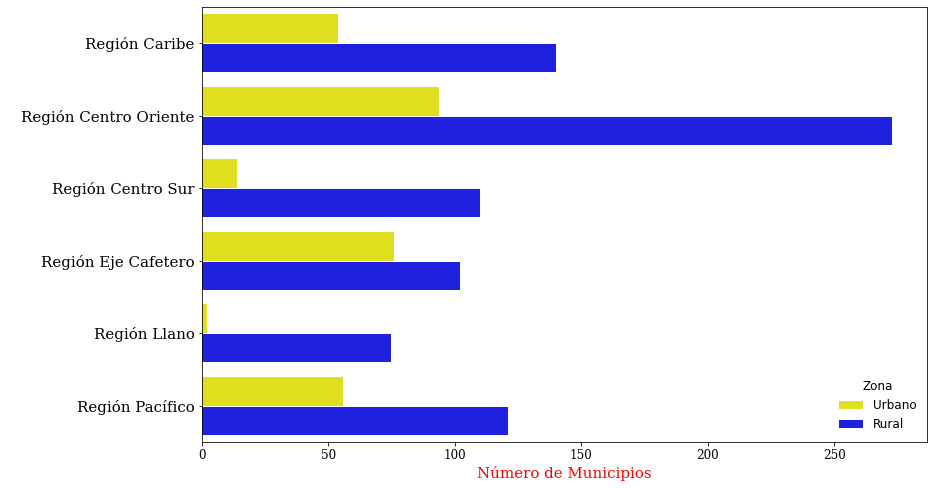

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]

fig = sns.barplot(y="Region",x="Superficie",hue="Zona",data=Municipios,estimator=len,
                  palette=dict(Rural="blue",Urbano="yellow"),
                  order=["Región Caribe","Región Centro Oriente","Región Centro Sur",
                         "Región Eje Cafetero","Región Llano","Región Pacífico"])

plt.xlabel("Número de Municipios",fontdict={"family":"serif","color":"red","size":15,"style":"normal"})
plt.ylabel(" ")
plt.yticks(color="black",family="serif",size=15,style="normal")
plt.xticks(color="black",family="serif",size=12,style="normal")
plt.legend(fontsize=12,loc="lower right",title="Zona",title_fontsize=12,frameon=False,ncol=1)
plt.grid(axis="y",color="white",ls="-",lw=1)
plt.show(fig)

Gráfico de barras con el total de la Superficie por Region y Zona en Colombia.

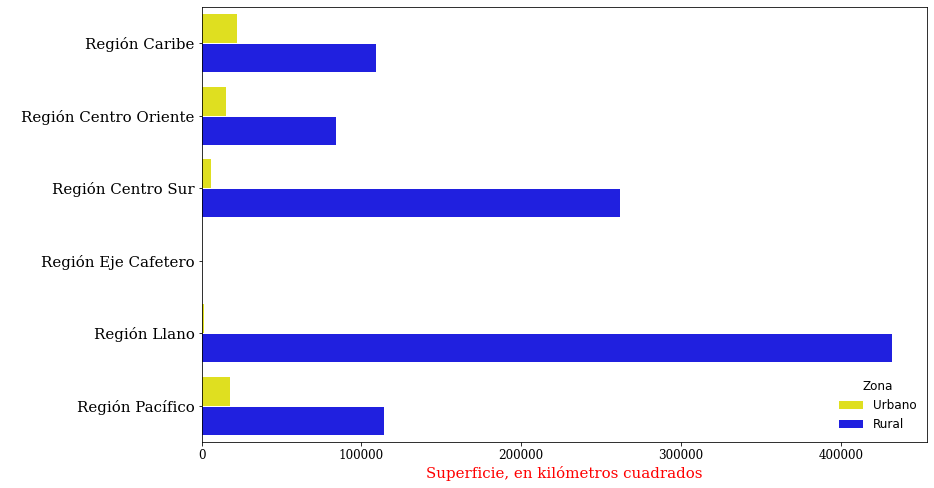

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]

fig = sns.barplot(y="Region",x="Superficie",hue="Zona",data=Municipios,estimator=sum,
                  palette=dict(Rural="blue",Urbano="yellow"),ci=None,
                  order=["Región Caribe","Región Centro Oriente","Región Centro Sur",
                         "Región Eje Cafetero","Región Llano","Región Pacífico"])

plt.xlabel("Superficie, en kilómetros cuadrados",fontdict={"family":"serif","color":"red","size":15,"style":"normal"})
plt.ylabel(" ")
plt.yticks(color="black",family="serif",size=15,style="normal")
plt.xticks(color="black",family="serif",size=12,style="normal")
plt.legend(fontsize=12,loc="lower right",title="Zona",title_fontsize=12,frameon=False,ncol=1)
plt.grid(axis="y",color="white",ls="-",lw=1)
plt.show(fig)

Gráfico de barras con el total de la Poblacion por Region y Zona en Colombia.

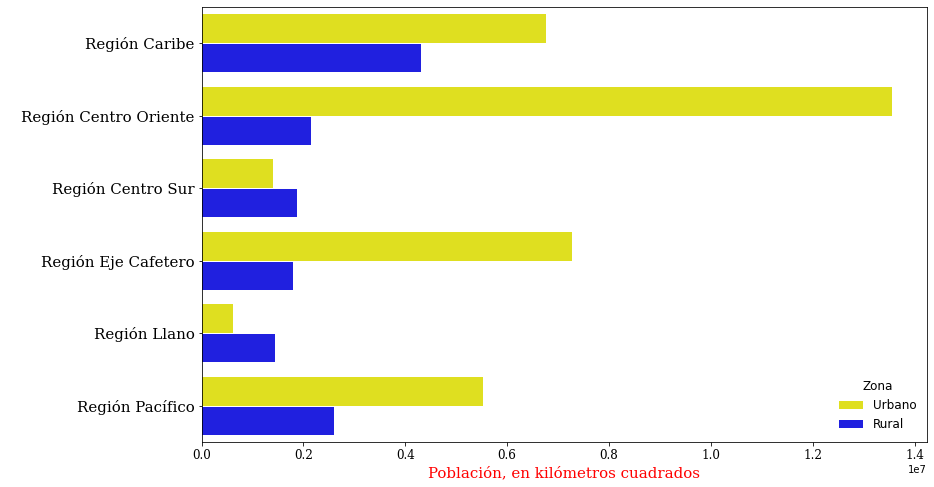

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]

fig = sns.barplot(y="Region",x="Poblacion",hue="Zona",data=Municipios,estimator=sum,
                  palette=dict(Rural="blue",Urbano="yellow"),ci=None,
                  order=["Región Caribe","Región Centro Oriente","Región Centro Sur",
                         "Región Eje Cafetero","Región Llano","Región Pacífico"])

plt.xlabel("Población, en kilómetros cuadrados",fontdict={"family":"serif","color":"red","size":15,"style":"normal"})
plt.ylabel(" ")
plt.yticks(color="black",family="serif",size=15,style="normal")
plt.xticks(color="black",family="serif",size=12,style="normal")
plt.legend(fontsize=12,loc="lower right",title="Zona",title_fontsize=12,frameon=False,ncol=1)
plt.grid(axis="y",color="white",ls="-",lw=1)
plt.show(fig)

Gráfico de pie con el porcentaje de municipios en cada categoria de la variable Zona.

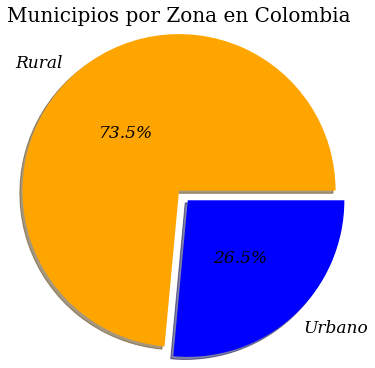

In [ ]:
torta = (Municipios
        .groupby(["Zona"])
        .agg(x=("Depmun","count")).reset_index()
        )
plt.rcParams['figure.figsize'] = [13, 6]

plt.pie(x=torta["x"],labels=torta["Zona"],autopct='%1.1f%%',radius=1.2,
        shadow=True,explode=[0,0.1],pctdistance=0.5,colors=["orange","blue"],
        textprops={"family":"serif","color":"black","size":17,"style":"oblique"})
plt.title("Municipios por Zona en Colombia",loc="center",
          fontdict={"family":"serif","color":"black","size":20,"style":"normal"})
plt.show()

Gráfico de pie con el porcentaje de la superficie en cada categoria de la variable Zona.

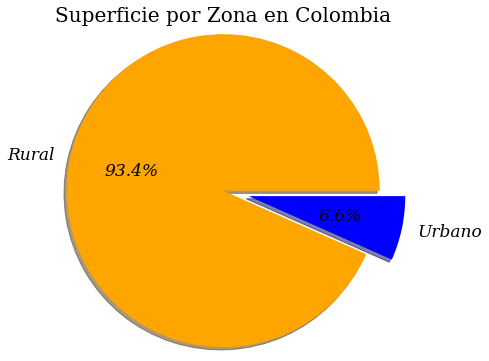

In [ ]:
torta = (Municipios
        .groupby(["Zona"])
        .agg(x=("Superficie","sum")).reset_index()
        )
plt.rcParams['figure.figsize'] = [13, 6]

plt.pie(x=torta["x"],labels=torta["Zona"],autopct='%1.1f%%',radius=1.2,
        shadow=True,explode=[0,0.2],pctdistance=0.6,colors=["orange","blue"],
        textprops={"family":"serif","color":"black","size":17,"style":"oblique"})
plt.title("Superficie por Zona en Colombia",loc="center",
          fontdict={"family":"serif","color":"black","size":20,"style":"normal"})
plt.show()

Gráfico de caja con la densidad de la población en cada categoria de la variable Region.

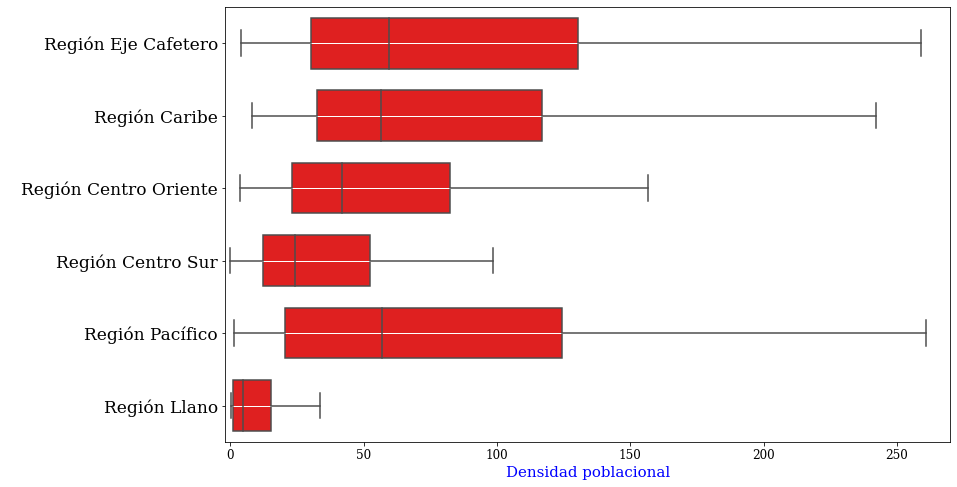

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
fig = sns.boxplot(x="denspobl",y="Region",data=Municipios, width=0.7, color="red", fliersize=0)

plt.xlim([-2,270])
plt.xticks(color="black",family="serif",size=12,style="normal")
plt.yticks(color="black",family="serif",size=17,style="normal")
plt.ylabel(" ")
plt.xlabel("Densidad poblacional",fontdict={"family":"serif","color":"blue","size":15,"style":"normal"})
plt.grid(axis="y",color="white",ls="-",lw=1)
plt.show(fig)

En estos datos, sacados de Diggle P.J., Heagarty P., Liang K.-Y. y Zeger S.L. (2002) Analysis of Longitudinal Data. Oxford University Press, Oxford, el principal objetivo del análisis es evaluar el efecto de la contaminación por ozono en el crecimiento de los árboles. En un primer grupo (treat=1), se cultivaron un total de 54 árboles en una atmósfera enriquecida con ozono, mientras que en un segundo grupo (treat=0), 25 árboles se cultivaron en una atmósfera normal. El tamaño de cada árbol (size) se observó 13 veces a lo largo del tiempo (days), es decir, 152, 174, 201, 227, 258, 469, 496, 528, 556, 579, 613, 639 y 674 días desde el inicio del experimento.

In [ ]:
spruce = pd.read_table("spruce.txt",delimiter="\t",header=0,decimal=",")
spruce["treat"] = spruce["treat"].map({0:"normal",1:"ozone-enriched"})
spruce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tree    1027 non-null   object 
 1   days    1027 non-null   int64  
 2   size    1027 non-null   float64
 3   treat   1027 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 32.2+ KB


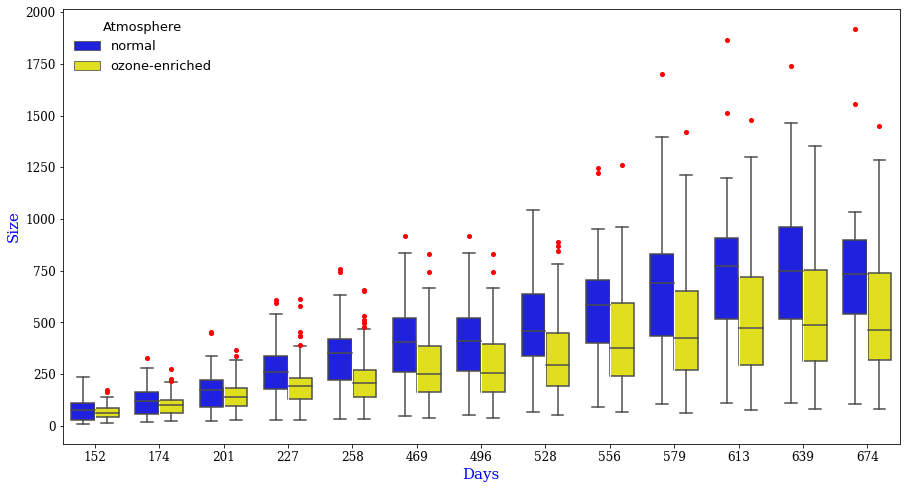

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]

fig = sns.boxplot(x="days",y="size",hue="treat", data=spruce, width=0.75,
      palette={"normal":"blue","ozone-enriched":"yellow"},
      flierprops={"marker":"o","markerfacecolor":"red","markeredgecolor":"red","markersize":4})

plt.xticks(color="black",family="serif",size=12,style="normal")
plt.yticks(color="black",family="serif",size=12,style="normal")
plt.xlabel("Days",fontdict={"family":"serif","color":"blue","size":15,"style":"normal"})
plt.ylabel("Size",fontdict={"family":"serif","color":"blue","size":15,"style":"normal"})
plt.grid(axis="x",color="white",ls="-",lw=1)
plt.legend(loc="upper left",fontsize=13,title="Atmosphere",title_fontsize=13,frameon=False,ncol=1)
plt.show(fig)

Se ilustra la evolución en el tiempo (date) de las cotizaciones (open) de todos los stocks (stock) usando los datos en stocks.dlm

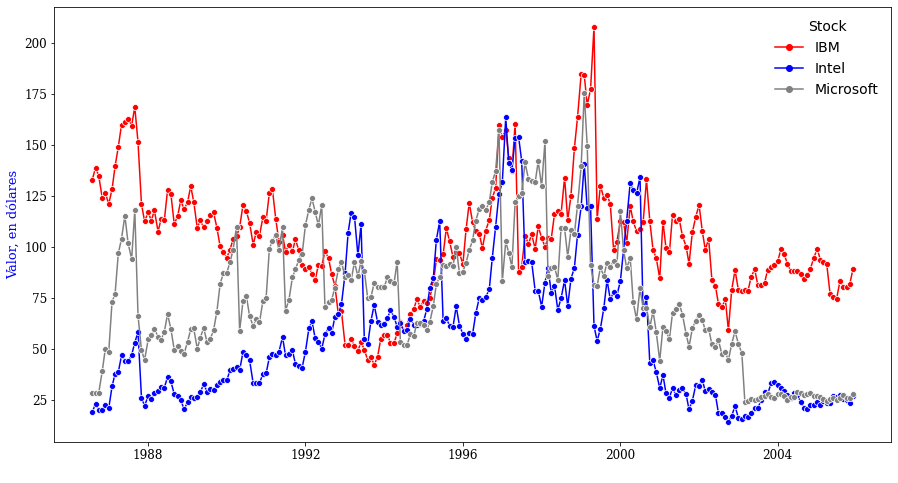

In [ ]:
stocks = pd.read_table("stocks.dlm",delimiter=" ",header=0,decimal=",",thousands=".",
                       names=["Stock","Date","Open","High","Low","Close","Volume","AdjClose"],
                       dtype={"Stock":str,"Date":str,"Open":np.float64,"High":np.float64,
                              "Low":np.float64,"Close":np.float64,"Volume":np.float64,
                               "AdjClose":np.float64},parse_dates=[1],infer_datetime_format=True)
plt.rcParams['figure.figsize'] = [15, 8]

fig = sns.lineplot(x="Date",y="Open",hue="Stock",style="Stock",dashes=False,
                   markers={"IBM":"o","Intel":"o","Microsoft":"o"},data=stocks,
                   palette={"IBM":"red","Intel":"blue","Microsoft":"gray"})

plt.xlabel(" ")
plt.yticks(color="black",family="serif",size=12,style="normal")
plt.xticks(color="black",family="serif",size=12,style="normal")
plt.ylabel("Valor, en dólares",fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.legend(loc="upper right",fontsize=14,title="Stock",title_fontsize=14,frameon=False,ncol=1)
plt.grid(axis="x",color="white",ls="-",lw=1)
plt.show(fig)

Diagramas de dispersión con sus repectivas barras de frecuencia



In [ ]:
cars = sns.load_dataset("mpg")
cars.loc[cars["origin"]=="usa","Origen"] = "Estados Unidos"
cars.loc[cars["origin"]!="usa","Origen"] = "Japón y Europa"

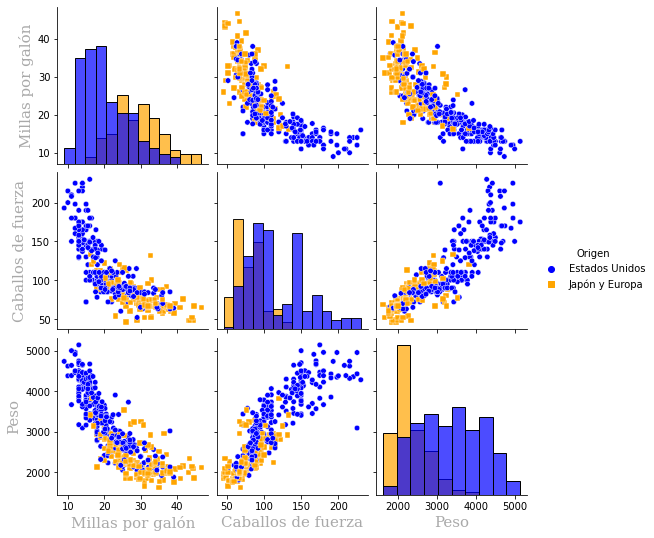

In [ ]:
fig = sns.pairplot(cars,vars=["mpg","horsepower","weight"],hue="Origen",kind="scatter",
                   diag_kind="hist",palette=["blue","orange"],
                   markers=["o","s"],plot_kws={"s":30},diag_kws={"alpha":0.7})
axes = fig.axes.flatten()
titulos = ["Millas por galón","Caballos de fuerza","Peso"]
c = np.sqrt(len(axes))
for ax1 in np.arange(0,c):
    for ax2 in np.arange(0,c):
        ax = int(ax1*c + ax2)
        if ax2 == 0: axes[ax].set_ylabel(titulos[int(ax1)],fontdict={"family":"serif","color":"darkgrey","size":15})
        if ax1 == c-1: axes[ax].set_xlabel(titulos[int(ax2)],fontdict={"family":"serif","color":"darkgrey","size":15})
plt.show(fig)

In [ ]:
# Ignorar warnings
import warnings
warnings.simplefilter("ignore")
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
mpl.warnings.filterwarnings('ignore', category=mpl.MatplotlibDeprecationWarning)

* **matplotlib.pyplot:** Es una interfaz que proporciona una forma de graficar similar a MATLAB.
* **numpy:** Significa “Numerical Python”, y es un paquete para la informática científica con Python. 
* **scipy:** Es una biblioteca de Python de código abierto que se utiliza para resolver problemas científicos y matemáticos.
* **scipy.stats:** Este módulo contiene varias distribuciones de probabilidad, y una biblioteca de funciones estadísticas.
* **seaborn:** Es una biblioteca de visualización de datos de Python, y está basada en matplotlib . Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.
* **pandas:** Es una librería de Python especializada en el manejo y análisis de estructuras de datos.

### **Uso de plt.plot y plt.show**

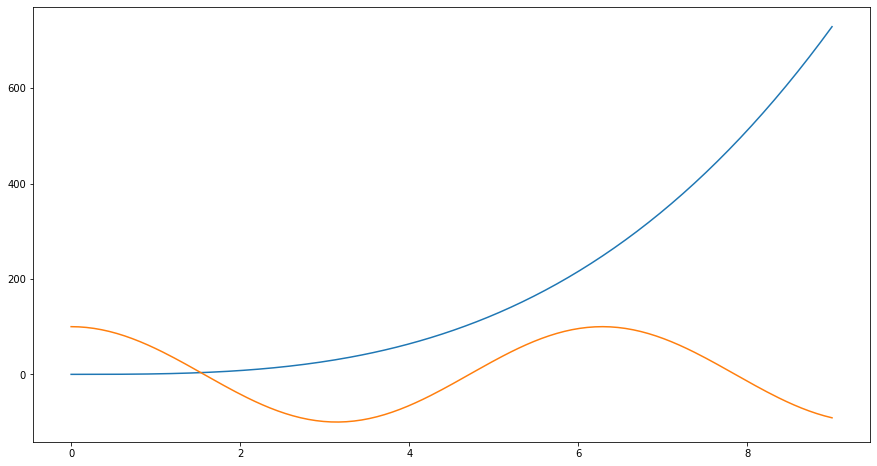

In [ ]:
x = np.linspace(0, 9, 200)  #inicio, fin, número de muestras generadas
 
plt.plot(x, x**3) #mostrar grafica y obj. relacionado
plt.plot(x, 100*np.cos(x))
 
#plt.show()

Se pueden especificar las características de las líneas trazadas, tales como color, tipo de línea, etc. [Aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) se encuentran los paramétros y valores posibles de cada uno.

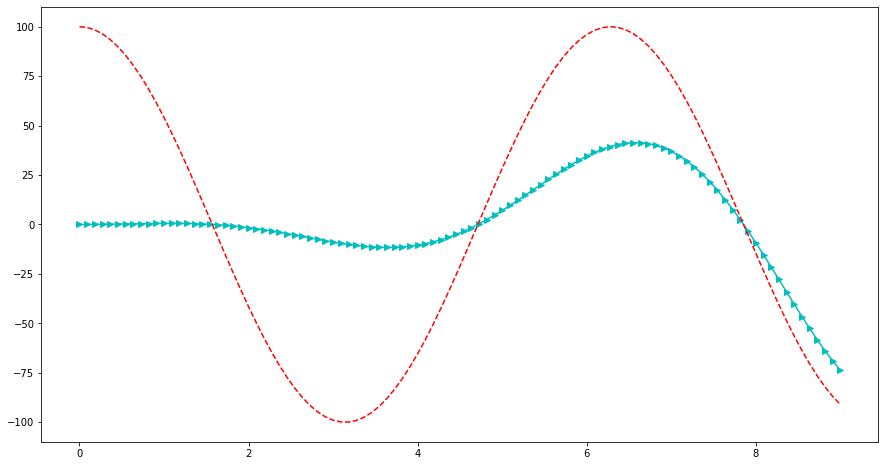

In [ ]:
x = np.linspace(0, 9, 100)

plt.plot(x, x**2*np.cos(x),color='c',marker='>')
plt.plot(x, 100*np.cos(x), '--',color='r')
plt.show()

## **Guardar imágenes**

Después de realizar algún gráfico, éste lo podemos guardar de varias maneras, una de ellas es de la siguiente manera:

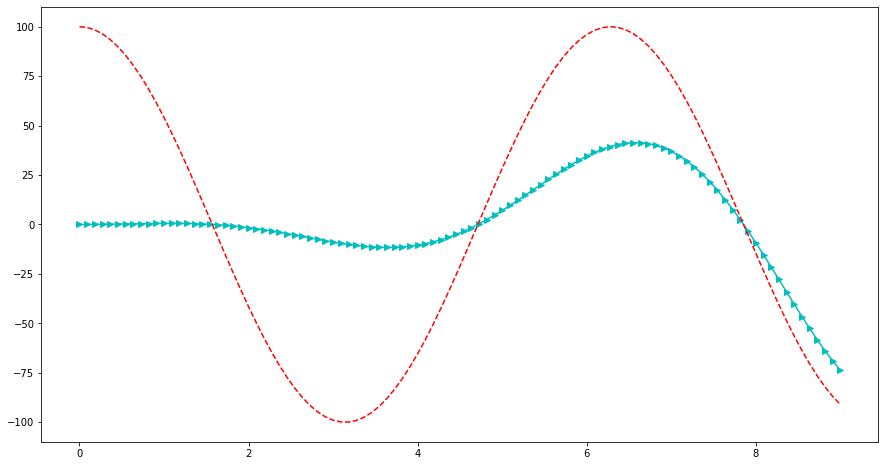

In [ ]:
x = np.linspace(0, 9, 100)

fig=plt.figure() 
plt.plot(x, x**2*np.cos(x),color='c',marker='>')
plt.plot(x, 100*np.cos(x), '--',color='r')
plt.show()

# Guardar imagen
fig.savefig('figura1.png')  #Podemos mofificar .png por .jpg, .jpeg

In [ ]:
# Verificar imagen se haya guardado
!ls -lh figura1.png

-rw-r--r-- 1 root root 34K Jun 19 16:14 figura1.png


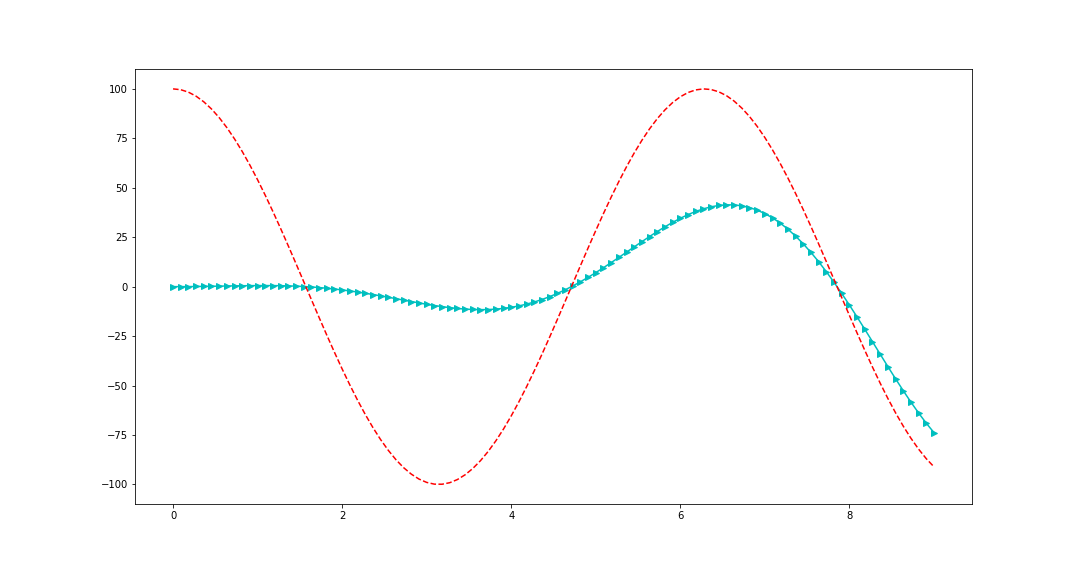

In [ ]:
#Mostrar figura guardada
Image('figura1.png') 

Dependiendo de la extensión con que se haya guardado la imagen, queda como cierto tipo de archivo. En el caso anterior se guardó como png, pero existen muchos más tipos, para saber cuáles podemos usar, se ejecuta lo siguiente:

In [ ]:
# Tipos de archivos admitidos, para guardar
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

### **Subplot**

Con los subplot se pueden organizar gráficas en una cuadrícula. Donde, se debe especificar el número de filas, columnas y el número del panel.

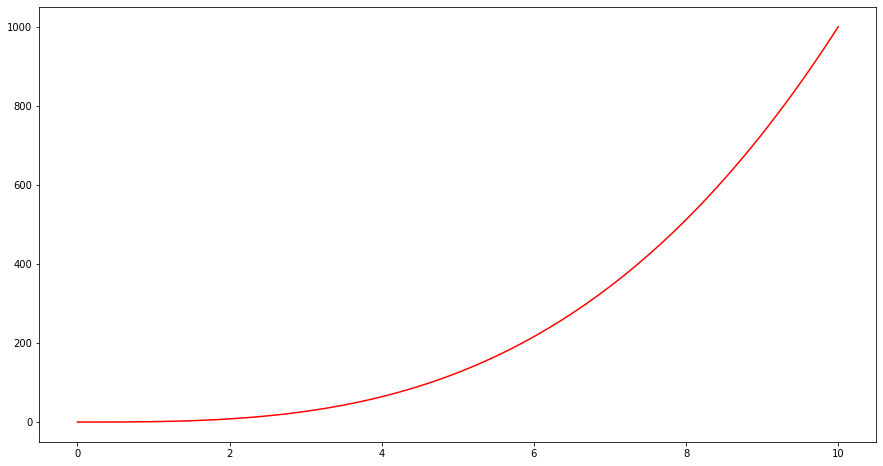

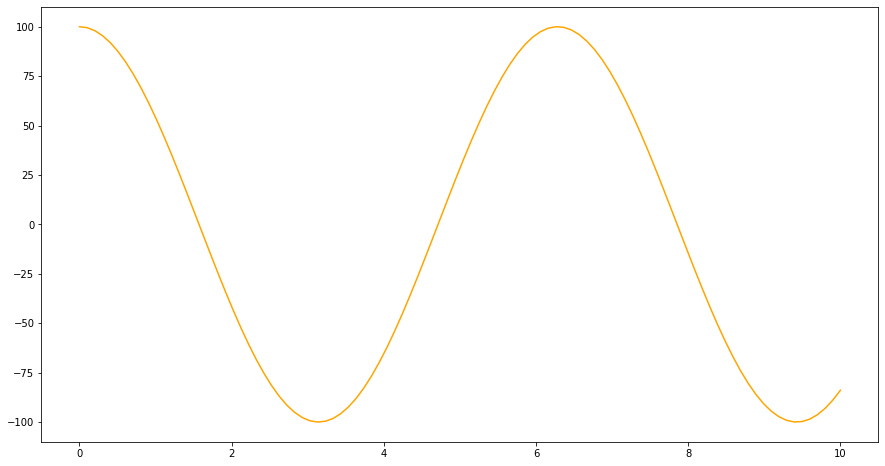

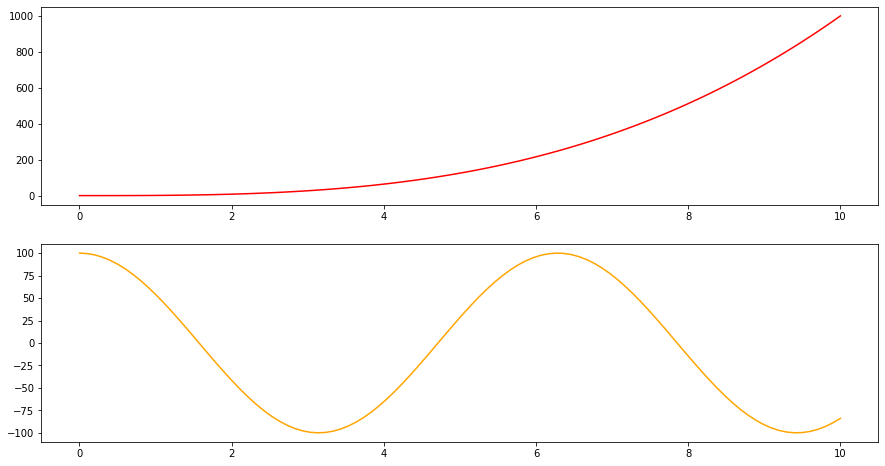

In [ ]:
x = np.linspace(0, 10, 100)

plt.plot(x, x**3,color="red")
plt.show()
plt.plot(x, 100*np.cos(x),color="orange")
plt.show()

##########################################

plt.figure()  # create a plot figure

plt.subplot(2, 1, 1) # (filas, columnas, número de panel)
plt.plot(x, x**3,color="red")

plt.subplot(2, 1, 2)
plt.plot(x, 100*np.cos(x),color="orange");

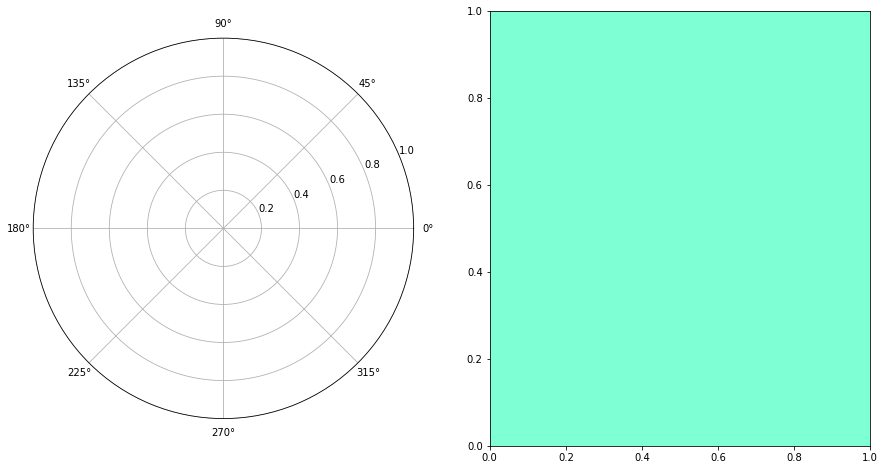

In [ ]:
plt.subplot(121)

# Subplot polar
plt.subplot(121, projection='polar')

# Fondo de color
plt.subplot(122, facecolor='aquamarine')
plt.show()

### **Insertar figuras en otras. Axes**

Son parecidos a los subplots, pero estos permiten colocar figuras dentro de otra figura con los mismos ejes.

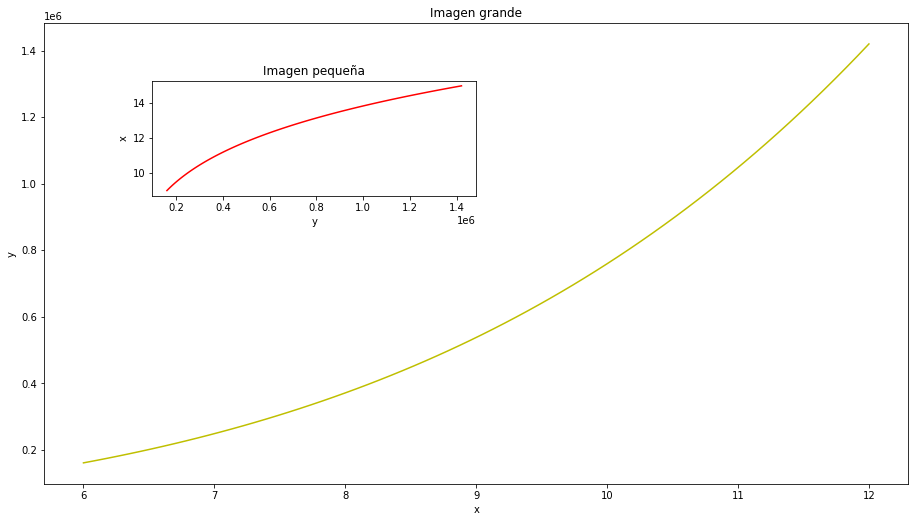

In [ ]:
x = np.linspace(4, 10, 70)
y = (x+7) ** 5

fig = plt.figure() #Crear una figura nueva o activar una figura existente

# fig.add_axes: ejes nuevos [izquierda, abajo, ancho, alto]
axes1 = fig.add_axes([4.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([4.2, 0.6, 0.3, 0.2]) # inset axes

# Figura grande
axes1.plot(x+2, y, 'y')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Imagen grande')

# Figura insertada
axes2.plot(y, x+5, 'r')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Imagen pequeña');

### **Títulos, etiquetas y leyendas**

Los títulos (titles) son el nombre que tienen los gráficos, las etiquetas (labels) son los nombres de los ejes y las leyendas (legends) son para guiarse cuando tenemos más de una trazado en el gráfico y se quieren diferenciarlas.

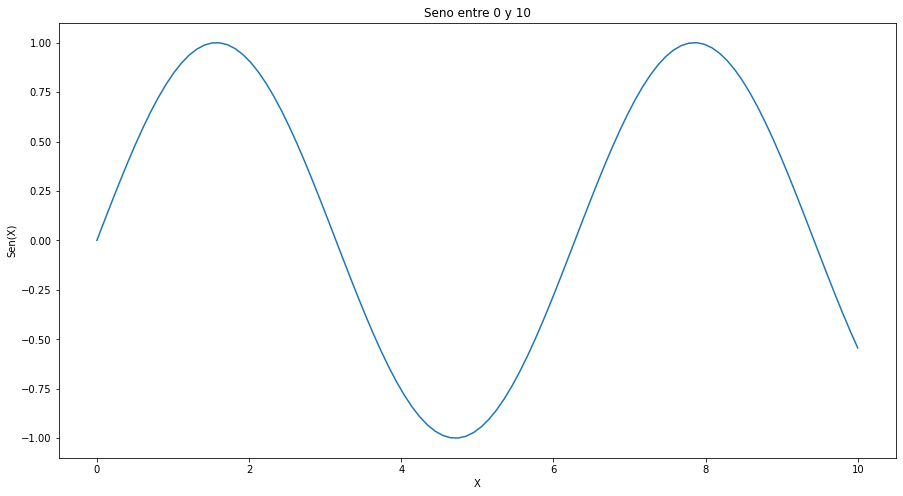

In [ ]:
# Titulo y etiquetas
x = np.linspace(0, 10, 100)
y=np.sin(x)
 
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Sen(X)')
 
plt.title('Seno entre 0 y 10')
plt.show()

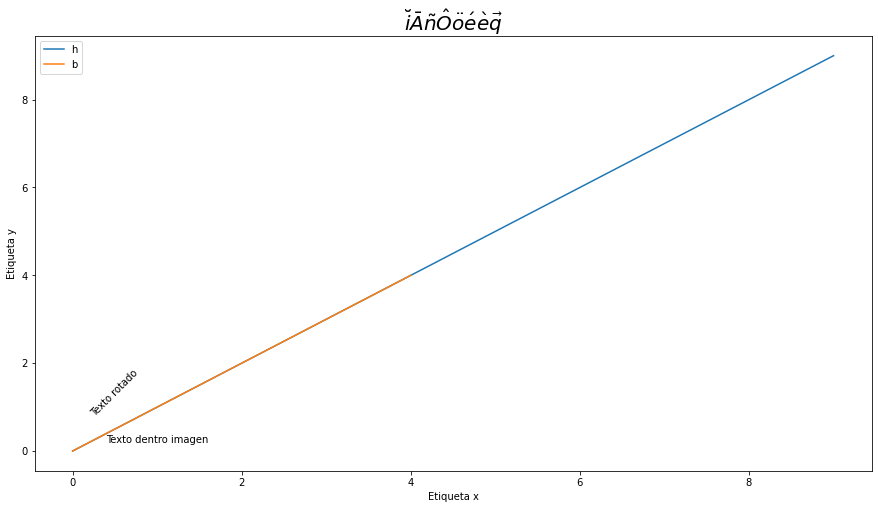

In [ ]:
# Titulo y etiquetas
fig, ax = plt.subplots()
ax.plot(range(10),label="h")
ax.plot(range(5),label="b")
ax.set_title(r'$\breve{i}\bar{A}\tilde{n}\hat{O}'
             r'\ddot{o}\acute{e}\grave{e}\vec{q}$', fontsize=20)
ax.set_xlabel("Etiqueta x")
ax.set_ylabel('Etiqueta y')
ax.text(0.2, 0.8, 'Texto rotado', rotation=45)
ax.text(0.4, 0.2, 'Texto dentro imagen')
plt.legend()

plt.show()

## Gráficos de dispersión

Los gráficos de dispersión se usan para poner puntos de datos relacionados en los ejes vertical y horizontal. Estos gráficos a veces se utilizan para mirar qué tanta relación hay entre variables.


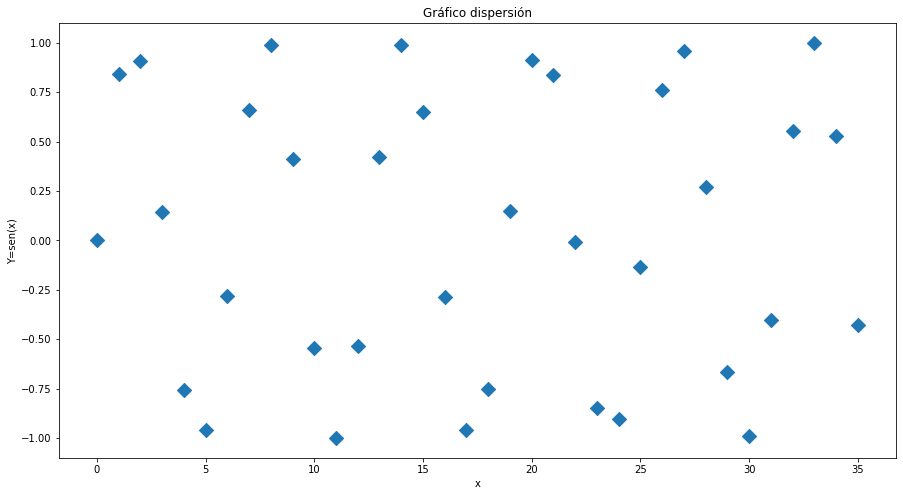

In [ ]:
x = range(0,36)
y = np.sin(x)
 
plt.scatter(x, y, marker='D', s=100)
 
plt.xlabel('x')
plt.ylabel('Y=sen(x)')
 
plt.title('Gráfico dispersión')
 
plt.show()

## Gráficos de barras

Los gráfico de barras resumen un conjunto de datos por categorías. Lo cual se ve por la altura de cada barra.

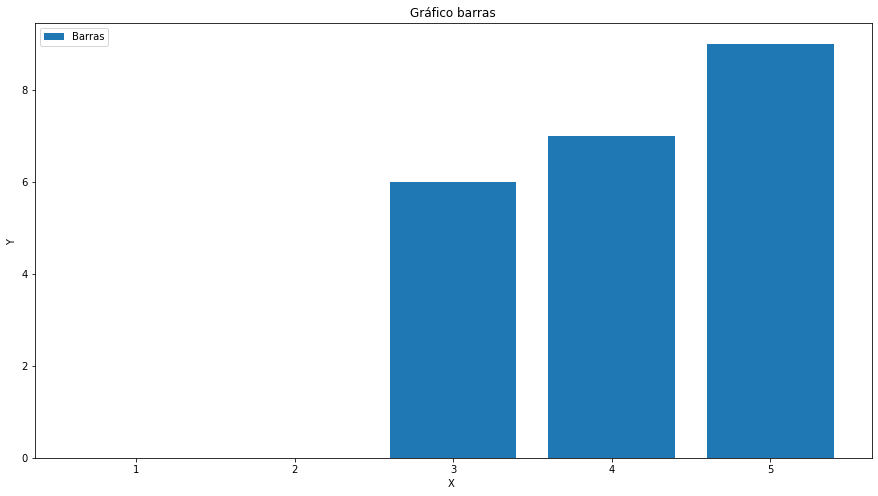

In [ ]:
x = [1,2,3,4,5] #posibles valores
y = [0,0,6,7,9] #altura de cada barra
 
plt.bar(x, y, label='Barras') 
 
plt.xlabel('X ')
plt.ylabel('Y ')
 
plt.title('Gráfico barras')
plt.legend()
plt.show()

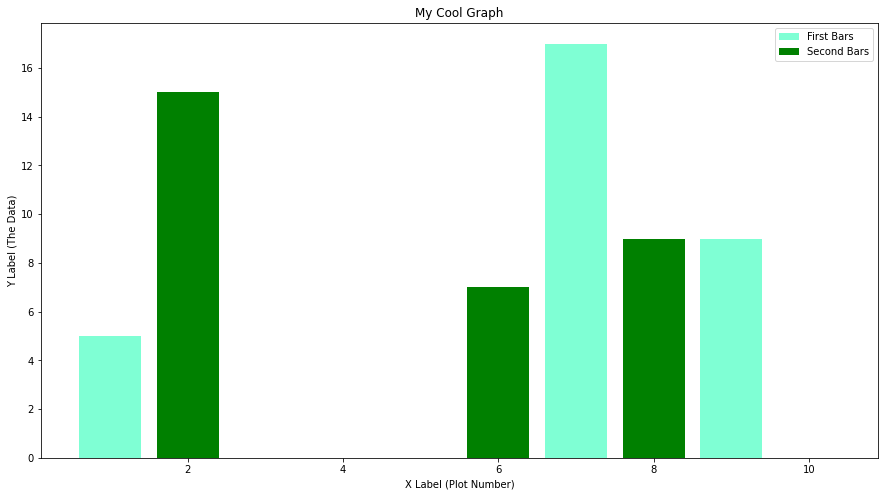

In [ ]:
x = [1, 3, 5, 7, 9]
y = [5, 0, 0, 17, 9]
 
x2 = [2, 4, 6, 8, 10]
y2 = [15, 0, 7, 9, 0]
 
plt.bar(x, y, label='First Bars',color="aquamarine")
plt.bar(x2, y2, label='Second Bars',color="green")
 
plt.xlabel('X Label (Plot Number)')
plt.ylabel('Y Label (The Data)')
 
plt.title('My Cool Graph')
plt.legend()
plt.show()

Si se quieren hacer gráficos de barras teniendo en cuenta divisiones dentro de los grupos, podemos utilizar los siguiente:

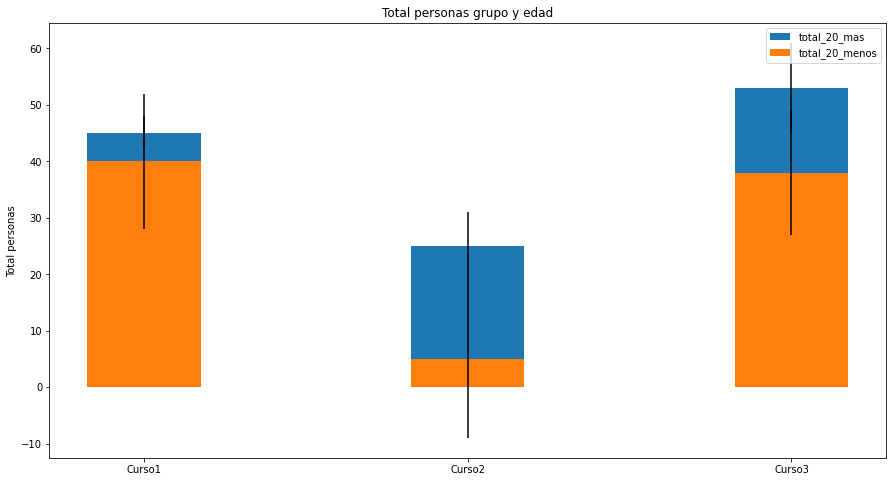

In [ ]:
labels = ['Curso1', 'Curso2', 'Curso3']
total_20_mas = [5,20,15]
total_20_menos = [40,5,38]
sd_20_mas = [3,6,8]
sd_20_menos = [12,14,11]
width = 0.35  

fig, ax = plt.subplots()

ax.bar(labels, total_20_mas, width, yerr=sd_20_mas, bottom=total_20_menos, label='total_20_mas')
ax.bar(labels, total_20_menos, width, yerr=sd_20_menos, 
       label='total_20_menos')

ax.set_ylabel('Total personas')
ax.set_title('Total personas grupo y edad')
ax.legend()

plt.show()

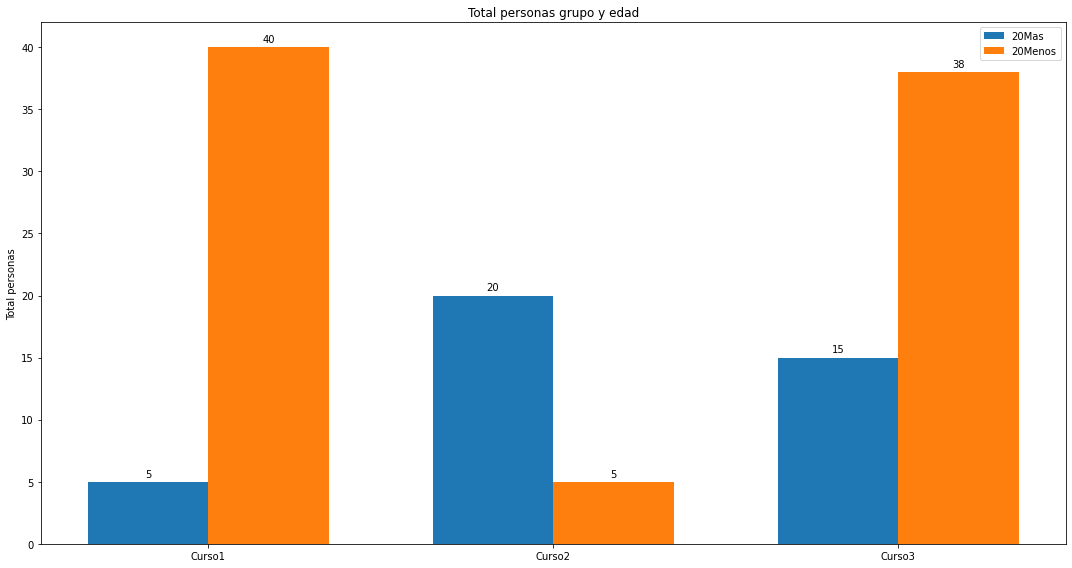

In [ ]:
labels = ['Curso1', 'Curso2', 'Curso3']
total_20_mas = [5,20,15]
total_20_menos = [40,5,38]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_20_mas, width, label='20Mas')
rects2 = ax.bar(x + width/2, total_20_menos, width, label='20Menos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total personas')
ax.set_title('Total personas grupo y edad')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Histogramas

Los histogramas son un gráfico en el que se ve la distribución de frecuencia ya sea relativa o absoluta de una variable cuantitativa. La altura de cada barra representa la frecuencia observada.

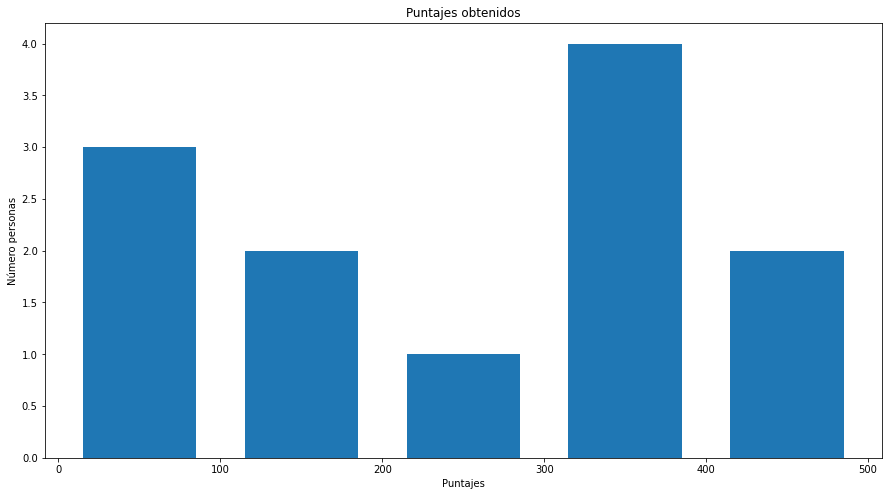

In [ ]:
puntaje=[102,455,326,9,22,45,378,338,556,111,224,422,305]
bins= [0,100,200,300,400,500]
 
plt.hist(puntaje, bins, histtype='bar', rwidth=0.7)
 
plt.xlabel('Puntajes')
plt.ylabel('Número personas')
 
plt.title('Puntajes obtenidos')
 
plt.show()

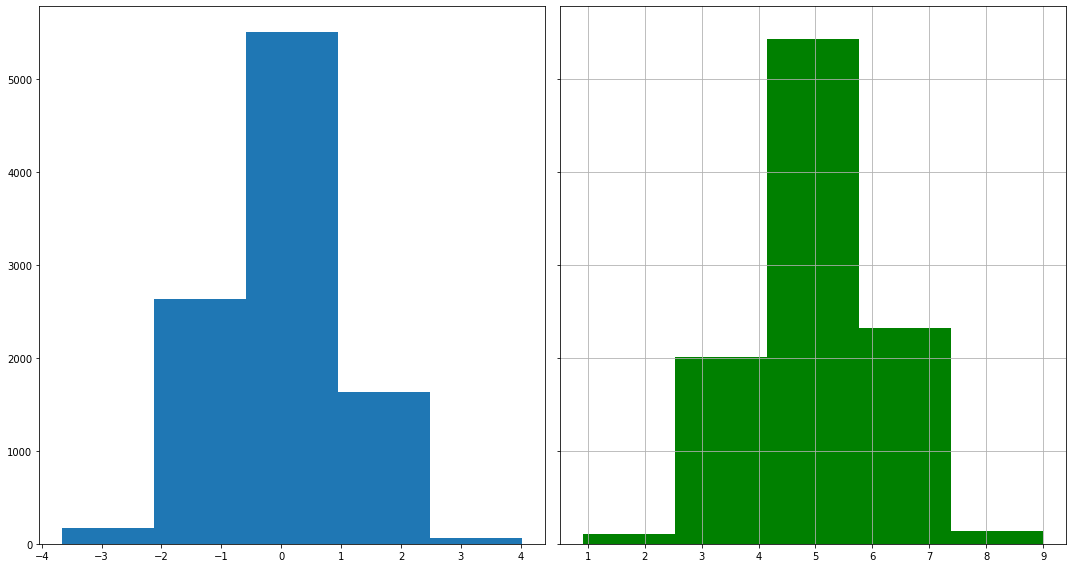

In [ ]:
# Semilla
np.random.seed(1)

N_points = 10000
n_bins = 5

# Distribución normal
x = np.random.randn(N_points) #Devolver 10000 muestras de la distribución norm.esta.dar
y = .4 * x + np.random.randn(10000) + 5 #Valor en y de cada valor en x

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins);  # bins: define el número de bins de igual ancho en el rango
plt.grid(True)
axs[1].hist(y, bins=n_bins,color='green'); 



## Gráficos circulares

Los gráficos circulares se dividen en sectores; cada uno muestra el tamaño de la información relacionada. Los gráficos circulares suelen utilizarse para mostrar tamaños relativos dentro de un todo.

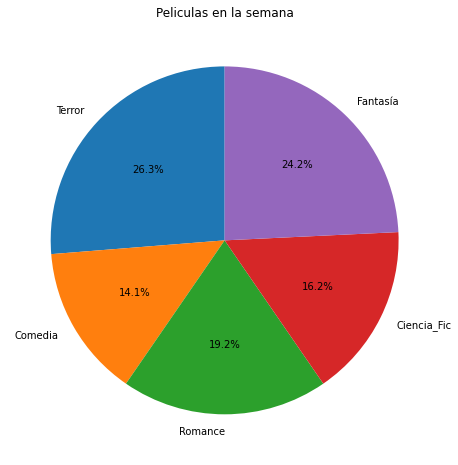

In [ ]:
Dias_sema = [1, 2, 3, 4, 5]
 
Terror = [8,9,0,4,5]
Comedia = [1,1,1,2,9]
Romance = [0,0,0,9,10]
Ciencia_Fic = [6,7,0,2,1]
Fantasia= [0,0,8,8,8]
 
pedazos = [sum(Terror), sum(Comedia), sum(Romance), sum(Ciencia_Fic),sum(Fantasia)]
marquillas = ['Terror', 'Comedia', 'Romance', 'Ciencia_Fic','Fantasía']
 
plt.pie(pedazos, labels=marquillas, startangle=90, autopct='%1.1f%%') #startangle:Angúlo inicio, autopct:porcentajes
 
plt.title('Peliculas en la semana')
#plt.legend()
plt.show()

## Boxplot

Los diagramas de caja son herramientas gráficas para visualizar medidas estadísticas como la mediana, la media y los cuartiles.

 Gráficamente se pueden realizar cambios en algunas características en la realización de los boxplot.

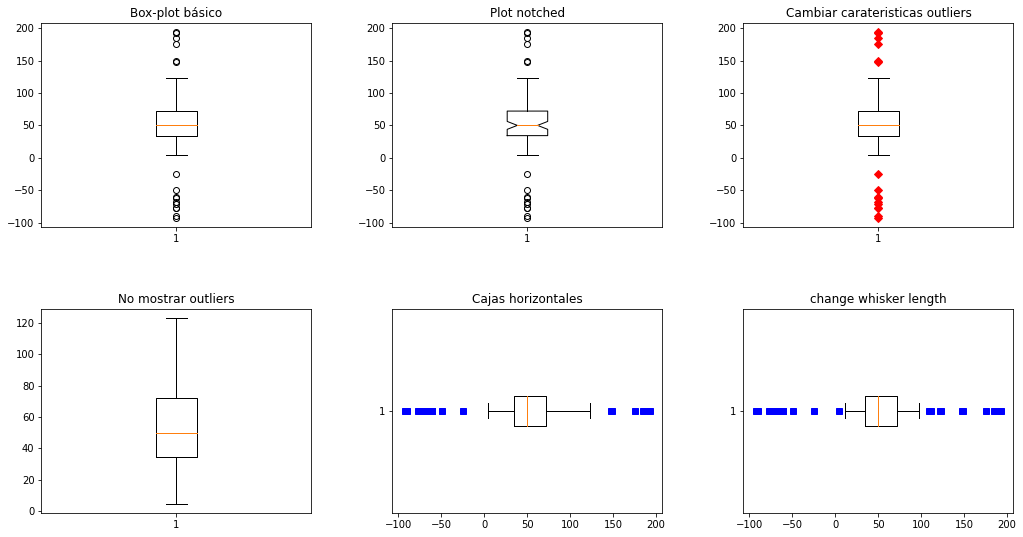

In [ ]:
# Fijar semilla
np.random.seed(19680801)

# Generación de datos aleatorios
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, axs = plt.subplots(2, 3) # 2 filas y 3 columnas

# Box-plot básico
axs[0, 0].boxplot(data)
axs[0, 0].set_title('Box-plot básico')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('Plot notched')

# Cambiar carateristicas outliers
axs[0, 2].boxplot(data, 0, 'rD') #r=red
axs[0, 2].set_title('Cambiar carateristicas outliers')

# No mostrar outliers
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("No mostrar outliers")

# Cajas horizontales
axs[1, 1].boxplot(data, 0, 'bs', 0)
axs[1, 1].set_title('Cajas horizontales')

# Cambiar tamaño bigotes
axs[1, 2].boxplot(data, 0, 'bs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

#Ajuste de los subplots
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()

También podemos realizar varios boxplot en uno gráfico:

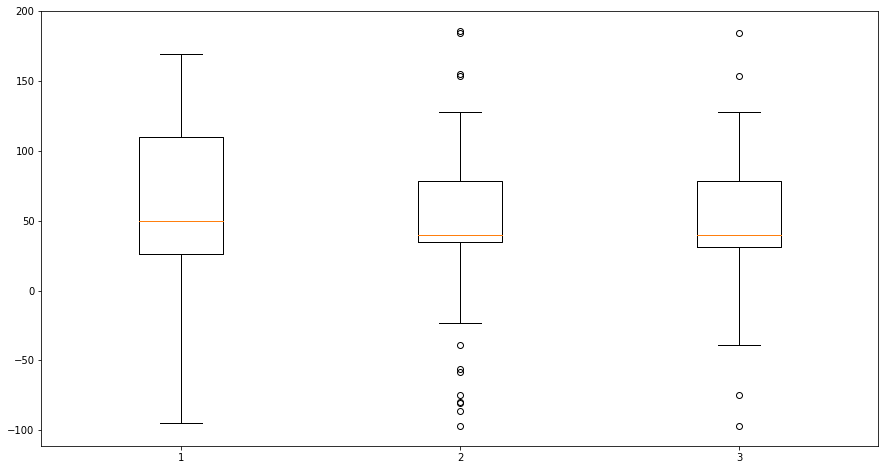

In [ ]:
#Primer grupo de datos aleatorios generados
np.random.seed(1)

spread = np.random.rand(30) * 70
center = np.ones(25) * 50
flier_high = np.random.rand(30) * 70 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

# Más realizaciones de datos generados
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data = [data, d2, d2[::2]]

# Multiples box-plot con mismos ejes
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

## **Densidades**

La función de densidad, es la probabilidad de que la variable aleatoria caiga en una región específica del espacio de posibilidades.

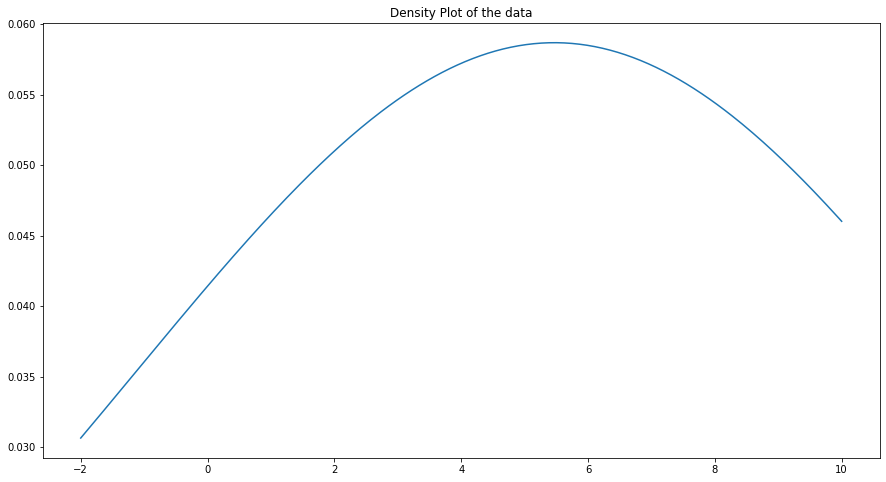

In [ ]:
data = [1,1,1,3,3,3,3,4,5,6,7,8,8,8,8,9,5,55,6,9,8,7]
density = kde.gaussian_kde(data) #Método
x = np.linspace(-2,10,300)
y=density(x)

plt.plot(x,y)
plt.title("Density Plot of the data")
plt.show()

En la gráfica de densidad anterior, el ancho de banda es automático,  generando así que la figura no sea lo suficientemente precisa. Entonces, para  establecer el ancho de banda, podemos usar la función covariance_factor y usar el método _compute_covariance para que todos los factores se calculen correctamente para generar el gráfico preciso.

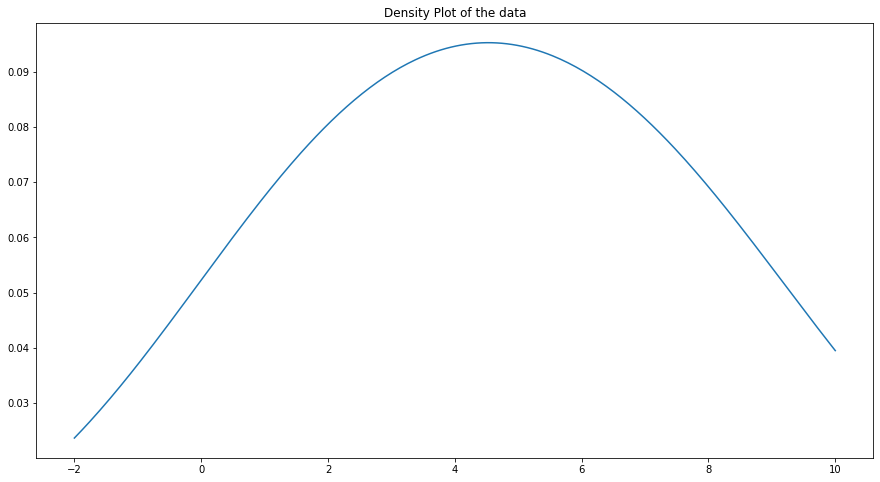

In [ ]:
data = [1,1,1,1,1,3,3,3,3,4,5,6,7,8,8,8,8,9,5,55,5,5,6]
prob_density = kde.gaussian_kde(data)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(-2,10,300)
y=prob_density(x)

plt.plot(x,y)
plt.title("Density Plot of the data")
plt.show()

### **Otra forma de graficar densidades**

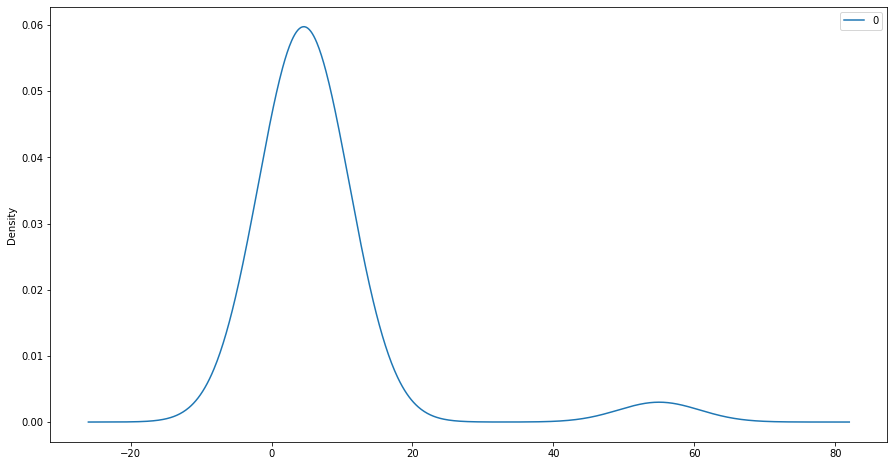

In [ ]:
data = [1,1,1,1,1,3,3,3,3,4,5,6,7,8,8,8,8,9,5,55,5,5,6]
pd.DataFrame(data).plot(kind='density')
plt.show()

Por otro lado, también se puede también realizar gráficos de densidades e histogramas conjuntamente, además de modificar que se realice vertical u horizontalmente.

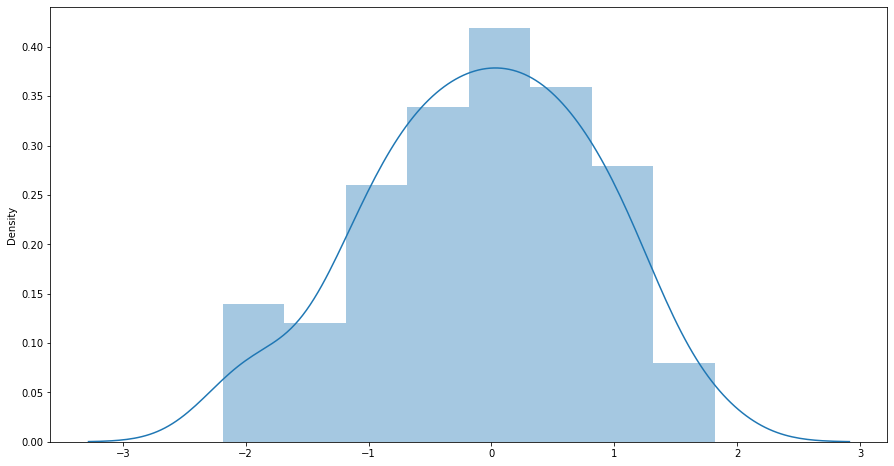

In [ ]:
#sns.set_theme()
np.random.seed(1212) #generar numeros aletorios
x = np.random.randn(100)
ax = sns.distplot(x)

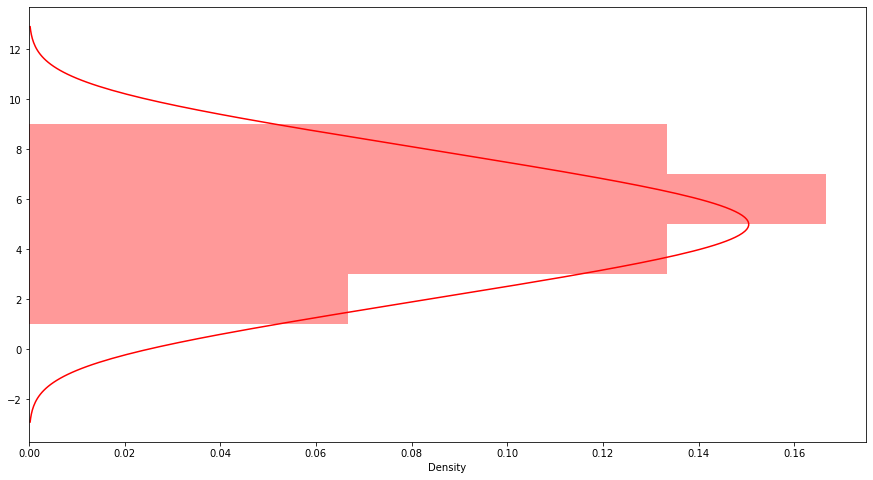

In [ ]:
sns.set_color_codes()
x= [1,2,3,3,4,4,5,5,5,6,6,7,7,8,9]
ax = sns.distplot(x, color="red",vertical=True)

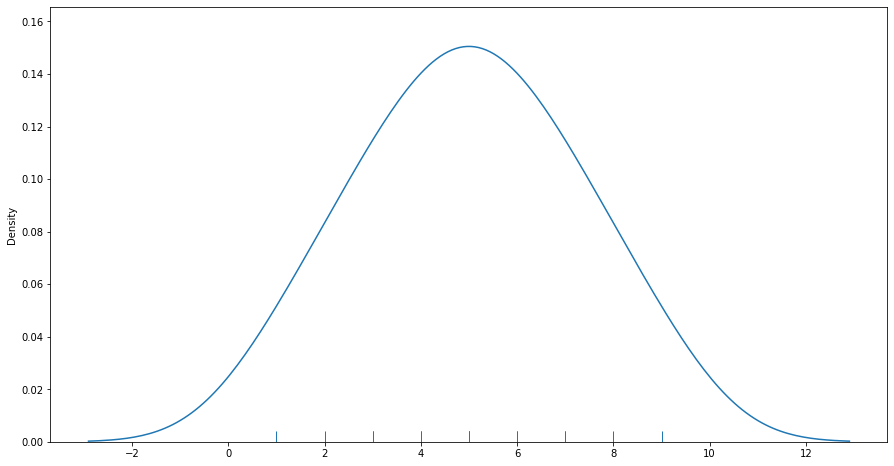

In [ ]:
ax = sns.distplot(x, rug=True, hist=False)